In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import cv2 
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos' , origin = dataset_url , cache_dir = '.' , untar = True)
data_dir 

'./datasets/flower_photos'

In [ ]:
import pathlib
data_directory = pathlib.Path(data_dir)
data_directory

PosixPath('datasets/flower_photos')

In [ ]:
image_count = len(list(data_directory.glob('"/".jpg')))
image_count

0

In [ ]:
roses = list(data_directory.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/2735666555_01d53e74fe.jpg'),
 PosixPath('datasets/flower_photos/roses/5180896559_b8cfefc21e.jpg'),
 PosixPath('datasets/flower_photos/roses/8960904651_9a0b727258.jpg'),
 PosixPath('datasets/flower_photos/roses/4504731519_9a260b6607_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1801614110_bb9fa46830.jpg')]

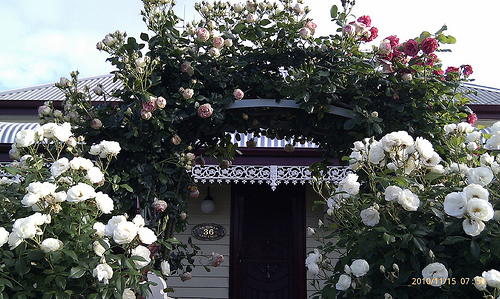

In [ ]:
#PIL is a module to show images
PIL.Image.open(str(roses[1]))

In [ ]:
flowers_images_dict = {
    'roses':list(data_directory.glob("roses/*")),
    'daisy':list(data_directory.glob("daisy/*")),
    'dandelion':list(data_directory.glob("dandelion/*")),
    'sunflowers':list(data_directory.glob("sunflowers/*")),
    'tulips':list(data_directory.glob("tulips/*")),
}

In [ ]:
flowers_labels_dict = {
    'roses':0 , 
    'daisy':1 , 
    'dandelion':2 , 
    'sunflowers':3 , 
    'tulips':4 ,
}

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0])) #The imread function of openCV module is used to read image file and convert it to an numpy array
img.shape

(374, 500, 3)

In [ ]:
cv2.resize(img , (180,180)).shape     #resizing or reshaping our image beacuse they vary in sizes and needs to be of one uniform size


(180, 180, 3)

In [ ]:
X , y = [] , []

for flower_name , images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img , (180,180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=0)

In [ ]:
len(X_train)

2752

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
num_classes = 5
model = Sequential([
               layers.Conv2D(16 , (3,3) , padding = 'same' , activation = 'relu') , 
               layers.MaxPooling2D(),
               layers.Conv2D(32 , (3,3) , padding = 'same' , activation = 'relu') , 
               layers.MaxPooling2D(),
               layers.Conv2D(64 , (3,3) , padding = 'same' , activation = 'relu') , 
               layers.MaxPooling2D(),
               layers.Flatten() , 
               layers.Dense(128 , activation = 'relu') , 
               layers.Dense(num_classes) , 
               
])

model.compile(optimizer = 'adam' , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True) , metrics = ['accuracy'])
model.fit(X_train_scaled , y_train , epochs = 30)

Epoch 1/30
86/86 [==============================] - 72s 832ms/step - loss: 1.3218 - accuracy: 0.4222
Epoch 2/30
86/86 [==============================] - 72s 837ms/step - loss: 0.9770 - accuracy: 0.6097
Epoch 3/30
86/86 [==============================] - 73s 847ms/step - loss: 0.7755 - accuracy: 0.7118
Epoch 4/30
86/86 [==============================] - 72s 837ms/step - loss: 0.5759 - accuracy: 0.7820
Epoch 5/30
86/86 [==============================] - 72s 833ms/step - loss: 0.3489 - accuracy: 0.8768
Epoch 6/30
86/86 [==============================] - 72s 836ms/step - loss: 0.2101 - accuracy: 0.9331
Epoch 7/30
86/86 [==============================] - 72s 834ms/step - loss: 0.1231 - accuracy: 0.9618
Epoch 8/30
86/86 [==============================] - 72s 832ms/step - loss: 0.0766 - accuracy: 0.9789
Epoch 9/30
86/86 [==============================] - 72s 835ms/step - loss: 0.0479 - accuracy: 0.9880
Epoch 10/30
86/86 [==============================] - 72s 836ms/step - loss: 0.0244 - accura

In [ ]:
model.evaluate(X_test_scaled , y_test)

29/29 [==============================] - 7s 233ms/step - loss: 1.8083 - accuracy: 0.5937


[1.8082654476165771, 0.5936819314956665]

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

array([[ -1.0080532 ,   0.95417386,  -2.4583466 ,   1.3989791 ,
          0.2982822 ],
       [  0.9698394 ,   1.6757203 ,   2.405214  ,  -2.3820052 ,
         -1.9861349 ],
       [  1.264615  ,   0.5409295 ,   2.5632632 ,  -2.1864614 ,
         -1.5258532 ],
       ...,
       [  2.0608718 ,  -0.54209715,  -3.68785   ,   2.0244799 ,
         -1.3333913 ],
       [ 13.491095  ,  -3.4286897 ,  -4.1525807 , -14.545952  ,
         14.564617  ],
       [ -0.5659726 ,  -9.397479  ,   2.2645905 ,   8.261295  ,
          0.12347299]], dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[0])
score


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.04320916, 0.30743986, 0.01013261, 0.47966346, 0.15955488],
      dtype=float32)>

In [ ]:
np.argmax(score)


3

In [ ]:
y_test[0]

1

In [ ]:
data_augmentation = keras.Sequential([
                                      layers.experimental.preprocessing.RandomFlip("horizontal" , input_shape = (img_height , img_width ,3)) , 
                                      layers.experimental.preprocessing.RandomRotation(0.1) ,
                                      layers.experimental.preprocessing.RandomZoom(0.1) ,
])

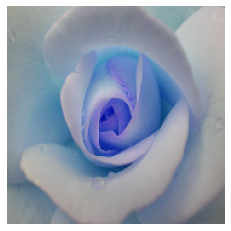

In [ ]:
plt.axis('off')
plt.imshow(X[0])

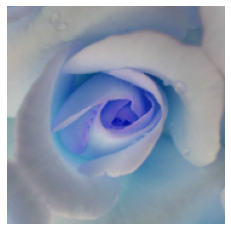

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [ ]:
num_classes = 5
model = Sequential([
                data_augmentation ,
               layers.Conv2D(16 , (3,3) , padding = 'same' , activation = 'relu') , 
               layers.MaxPooling2D(),
               layers.Conv2D(32 , (3,3) , padding = 'same' , activation = 'relu') , 
               layers.MaxPooling2D(),
               layers.Conv2D(64 , (3,3) , padding = 'same' , activation = 'relu') , 
               layers.MaxPooling2D(),
               layers.Dropout(0.2) ,
               layers.Flatten() , 
               layers.Dense(128 , activation = 'relu') , 
               layers.Dense(num_classes) , 
               
])

model.compile(optimizer = 'adam' , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True) , metrics = ['accuracy'])
model.fit(X_train_scaled , y_train , epochs = 30)

Epoch 1/30
86/86 [==============================] - 98s 1s/step - loss: 1.3917 - accuracy: 0.4055
Epoch 2/30
86/86 [==============================] - 81s 939ms/step - loss: 1.0976 - accuracy: 0.5436
Epoch 3/30
86/86 [==============================] - 79s 914ms/step - loss: 1.0296 - accuracy: 0.5854
Epoch 4/30
86/86 [==============================] - 79s 915ms/step - loss: 0.9452 - accuracy: 0.6319
Epoch 5/30
86/86 [==============================] - 79s 914ms/step - loss: 0.8841 - accuracy: 0.6479
Epoch 6/30
86/86 [==============================] - 79s 918ms/step - loss: 0.8612 - accuracy: 0.6493
Epoch 7/30
86/86 [==============================] - 79s 915ms/step - loss: 0.8135 - accuracy: 0.6828
Epoch 8/30
86/86 [==============================] - 82s 957ms/step - loss: 0.7916 - accuracy: 0.6879
Epoch 9/30
86/86 [==============================] - 79s 918ms/step - loss: 0.7647 - accuracy: 0.6955
Epoch 10/30
86/86 [==============================] - 79s 918ms/step - loss: 0.7505 - accuracy:

In [1]:
model.evaluate(X_test_scaled , y_test)

NameError: ignored